# SocialGraphs Week 3

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

The standard deviation of <k> in a random network is given by $\sigma_k = <k>^{1/2}$ which does not leave room for outliers, and all nodes are expected to be of comparable degree.

In a real network, an outlier with many links could be a celebrity with many followers on Facebook/Twitter/Instagram.

**List the four regimes that characterize random networks as a function of $⟨k⟩$.**

Subcritical: $0 < \langle k \rangle < 1$ and $p < 1 / N $

Critical: $\langle k \rangle = 1$ and $p = 1 / N $

Supercritical: $\langle k \rangle > 1$ and $p > 1 / N $

Connected: $\langle k \rangle = ln(N)$ and $p = ln(N) / N $

**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$
 decreases as a function of $k$
 in real-world networks?**

Key points:
* Your friends tend to be friends with each other, i.e. a real friend network tends to be more clustered than a random network
* $\langle C\rangle /\langle k\rangle $ does not decrease with $N^{-1}$, but it is largely independent of $N$.
* Real networks have a much higher clustering coefficient than expected for a random network of similar N and L.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [24]:
help(nx.watts_strogatz_graph)

Help on function watts_strogatz_graph in module networkx.generators.random_graphs:

watts_strogatz_graph(n, k, p, seed=None)
    Return a Watts–Strogatz small-world graph.
    
    Parameters
    ----------
    n : int
        The number of nodes
    k : int
        Each node is joined with its `k` nearest neighbors in a ring
        topology.
    p : float
        The probability of rewiring each edge
    seed : int, optional
        Seed for random number generator (default=None)
    
    See Also
    --------
    newman_watts_strogatz_graph()
    connected_watts_strogatz_graph()
    
    Notes
    -----
    First create a ring over $n$ nodes [1]_.  Then each node in the ring is joined
    to its $k$ nearest neighbors (or $k - 1$ neighbors if $k$ is odd).
    Then shortcuts are created by replacing some edges as follows: for each
    edge $(u, v)$ in the underlying "$n$-ring with $k$ nearest neighbors"
    with probability $p$ replace it with a new edge $(u, w)$ with uniformly
    ra

**Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0, 0.1, and 1. **

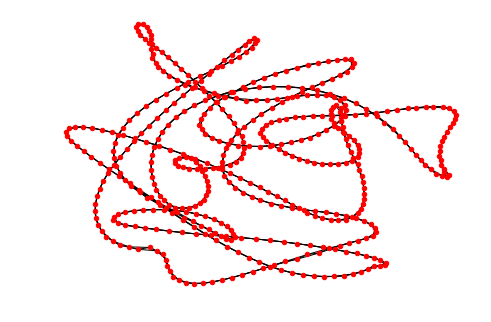

In [12]:
nx.draw(G1, node_size=20)
plt.show()

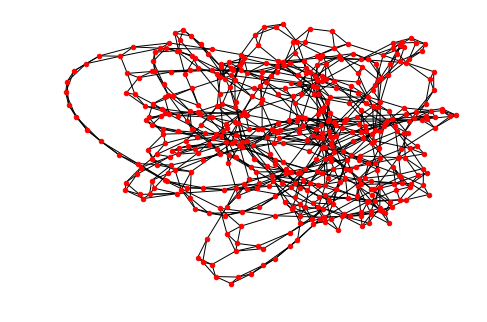

In [22]:
nx.draw(G2, node_size=20)
plt.show()

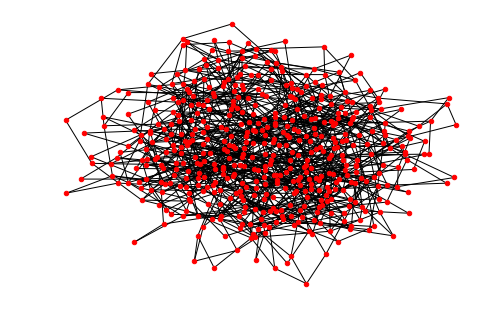

In [23]:
nx.draw(G3, node_size=20)
plt.show()

**Calculate the average shortest path length ⟨d⟩
 for each one. Describe what happens to the network when p=1.**

In [36]:
# My god this is ugly. python, not even once
dist1 = np.array((dict(nx.shortest_path_length(G1)).values())[0].values())
dist2 = np.array((dict(nx.shortest_path_length(G2)).values())[0].values())
dist3 = np.array((dict(nx.shortest_path_length(G3)).values())[0].values())

In [37]:
print "Average shortest path (G1):", np.mean(dist1)
print "Average shortest path (G2):", np.mean(dist2)
print "Average shortest path (G3):", np.mean(dist3)

Average shortest path (G1): 62.75
Average shortest path (G2): 7.286
Average shortest path (G3): 4.766


In [38]:
print "<d> =", np.log(N) / np.log(k_e)

<d> = 4.4828921423310435


**Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}.**

**Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. **

**Use the standard deviation to add errorbars to the plot.**

In [61]:
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
n = len(p_values)
m = 50
d_avgs = np.zeros((n,m))

Creating a graph and calculating shortest path 300 times takes about 6 minutes, so I've saved the result in a variable.

In [62]:
%%time
for i in range(n):
    for j in range(m):
        G = nx.watts_strogatz_graph(500, 4, p_values[i])
        d_avgs[i,j] = np.mean(dict(nx.shortest_path_length(G))[0].values())

CPU times: user 6min 10s, sys: 3.14 s, total: 6min 13s
Wall time: 6min 13s


The variable is stored an numpy file, and is loaded into the variable D.

In [84]:
D = np.load("dist_matrix_6x50.npy")
D_avg = np.mean(D, axis=1)
D_std = np.std(D, axis=1)

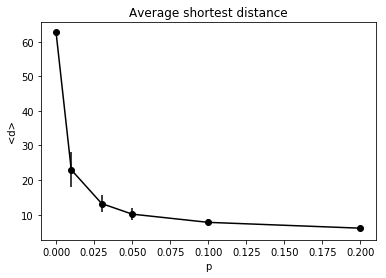

In [92]:
plt.errorbar(p_values, D_avg, yerr=D_std, fmt='-o', color="black")
plt.title("Average shortest distance")
plt.xlabel("p")
plt.ylabel("<d>")
plt.show()

# Power Law Networks

### Book Questions

#### What are the three slope dependent regimes of complex networks with power-law degree distributions?

**Sublinear Regime (0 < α < 1)**

*The degree distribution has fewer and smaller hubs than in a scale-free network. 
As $α → 1$ the cutoff length increases and $p_k$ follows a power law over an increasing range of degrees.*

**Linear Regime (α=1)**

*This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.*

**Superlinear Regime (α > 1)**

*The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them.*

#### What are the three regimes we find in non-linear preferential attachement?

In [112]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [113]:
# From https://stackoverflow.com/a/10636583
def flatten_edgelist(graph):
    return list(sum(graph.edges, ()))

In [153]:
# Sorts by highest frequency of degree
def degree_sequence_sorted(graph):
    return sorted([d for n, d in graph.degree()], reverse=True)

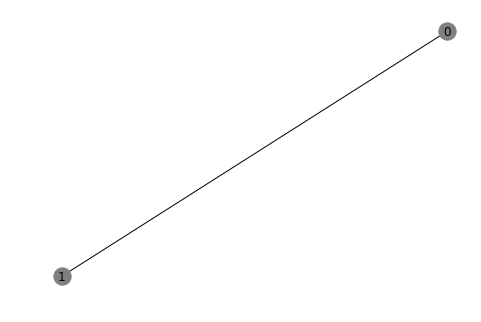

In [135]:
G = nx.Graph()
G.add_edges_from([(0,1)])
nx.draw(G, with_labels=True, node_color="gray", node_size=300)

In [136]:
for node in range(2, 5000):
    edges = flatten_edgelist(G)
    pick = random.choice(edges)
    G.add_edges_from([(node, pick)])

In [138]:
degrees = np.array(degree_sequence_sorted(G))

In [139]:
np.save("degrees", degrees)

### Degree Distribution (Histogram)

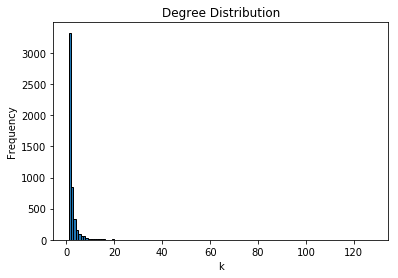

In [141]:
degrees = degree_sequence_sorted(G)
v = range(min(degrees), max(degrees)+1)
plt.hist(degrees, bins=v, edgecolor="black")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

In [146]:
hist = np.histogram(degrees, bins=v)
v = range(min(degrees), max(degrees)+1)
freqs, edges = hist[0], hist[1]
n = freqs.size
means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]

### Degree Distribution Scatter Plot 

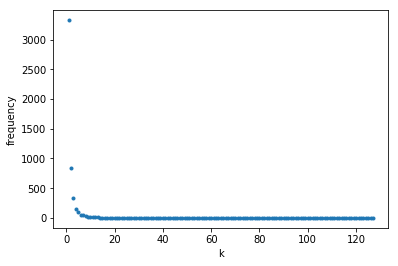

In [147]:
plt.plot(means, freqs, ".")
plt.xlabel("k")
plt.ylabel("frequency")
plt.show()

### Degree Distribution Log-Log Plot

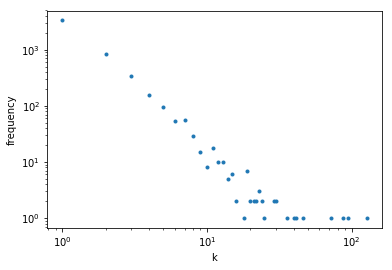

In [151]:
plt.loglog(means, freqs, ".")
plt.xlabel("k")
plt.ylabel("frequency")
plt.show()

## Exploring the Friendship Paradox

In [168]:
nodes = list(G.nodes)
N = 0 # Number of times neighbors have more friends on avg
for _ in range(1000):
    node = random.choice(nodes)
    neighbors = list(G.neighbors(node))
    k_avg_neighbors = np.mean(dict(G.degree(neighbors)).values())
    k_node = G.degree(node)
    if k_node < k_avg_neighbors:
        N += 1
        
print N, "/ 1000 times"

867 / 1000 times


### Same network - But without the preferential node selection

In [174]:
G2 = nx.Graph()
G2.add_edges_from([(0,1)])

for node in range(2, 5000):
    nodes = list(G2.nodes)
    pick = random.choice(nodes)
    G2.add_edges_from([(node, pick)])

### Degree Distribution Histogram

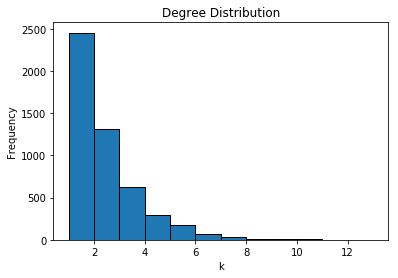

In [175]:
degrees2 = degree_sequence_sorted(G2)
v2 = range(min(degrees2), max(degrees2)+1)
plt.hist(degrees2, bins=v2, edgecolor="black")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

### Degree Distribution Scatter Plot

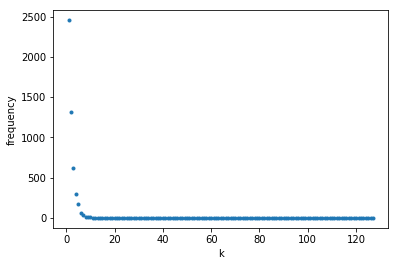

In [176]:
hist2 = np.histogram(degrees2, bins=v)
freqs2, edges2 = hist2[0], hist2[1]
n2 = freqs2.size
means2 = [(edges2[i] + edges2[i+1]) / 2 for i in range(n)]

plt.plot(means2, freqs2, ".")
plt.xlabel("k")
plt.ylabel("frequency")
plt.show()

### Degree Distribution Log-Log Plot

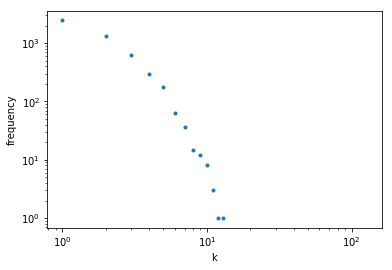

In [177]:
plt.loglog(means2, freqs2, ".")
plt.xlabel("k")
plt.ylabel("frequency")
plt.show()